## 1. Read Data

In [1]:
import pandas as pd

# Load the dataset
data_path = '../Database/diabetes.csv'
diabetes_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure and contents
diabetes_data.head(10).T


,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


The data set contains the following features:

- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI (Body Mass Index)
- DiabetesPedigreeFunction (diabetes pedigree function)
- Age
- Outcome (result, 1 means diabetes, 0 means no diabetes)

Glucose, BloodPressure, SkinThickness, Insulin, and BMI have some values as 0, which is biologically impossible, so we can infer that these 0 values are actually missing values.

Outcome is a binary variable, with 0 indicating no diabetes and 1 indicating diabetes. About 35% of the samples in the dataset are diabetic, which indicates that the dataset is relatively balanced.

## 2. Use median to fill missing values

In [2]:
import numpy as np

# Before replacing the zeros, we'll identify the columns with missing values (zeros)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN to accurately compute the median
for column in columns_with_zeros:
    diabetes_data[column].replace(0, np.nan, inplace=True)

# Now, compute the median of these columns
medians = diabetes_data[columns_with_zeros].median()

# Replace NaN values with the computed medians
diabetes_data.fillna(medians, inplace=True)

# Check the first few rows of the dataset to confirm the replacement
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. standardized data set

In [3]:
# Standardize the dataset (excluding the Outcome column)
standardized_data = (diabetes_data.drop(columns='Outcome') - diabetes_data.drop(columns='Outcome').mean()) / diabetes_data.drop(columns='Outcome').std()

# We'll add the Outcome column back to the standardized data
standardized_data['Outcome'] = diabetes_data['Outcome']

# Display the first few rows of the standardized dataset
standardized_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.865481,-0.031969,0.670206,-0.181423,0.166511,0.468187,1.425067,1
1,-0.844335,-1.204281,-0.527975,-0.012293,-0.181423,-0.851645,-0.364823,-0.190548,0
2,1.233077,2.015348,-0.693310,-0.012293,-0.181423,-1.331632,0.604004,-0.105515,1
3,-0.844335,-1.072868,-0.527975,-0.694792,-0.540290,-0.633469,-0.920163,-1.040871,0
4,-1.141108,0.504094,-2.677331,0.670206,0.316360,1.548294,5.481337,-0.020483,1


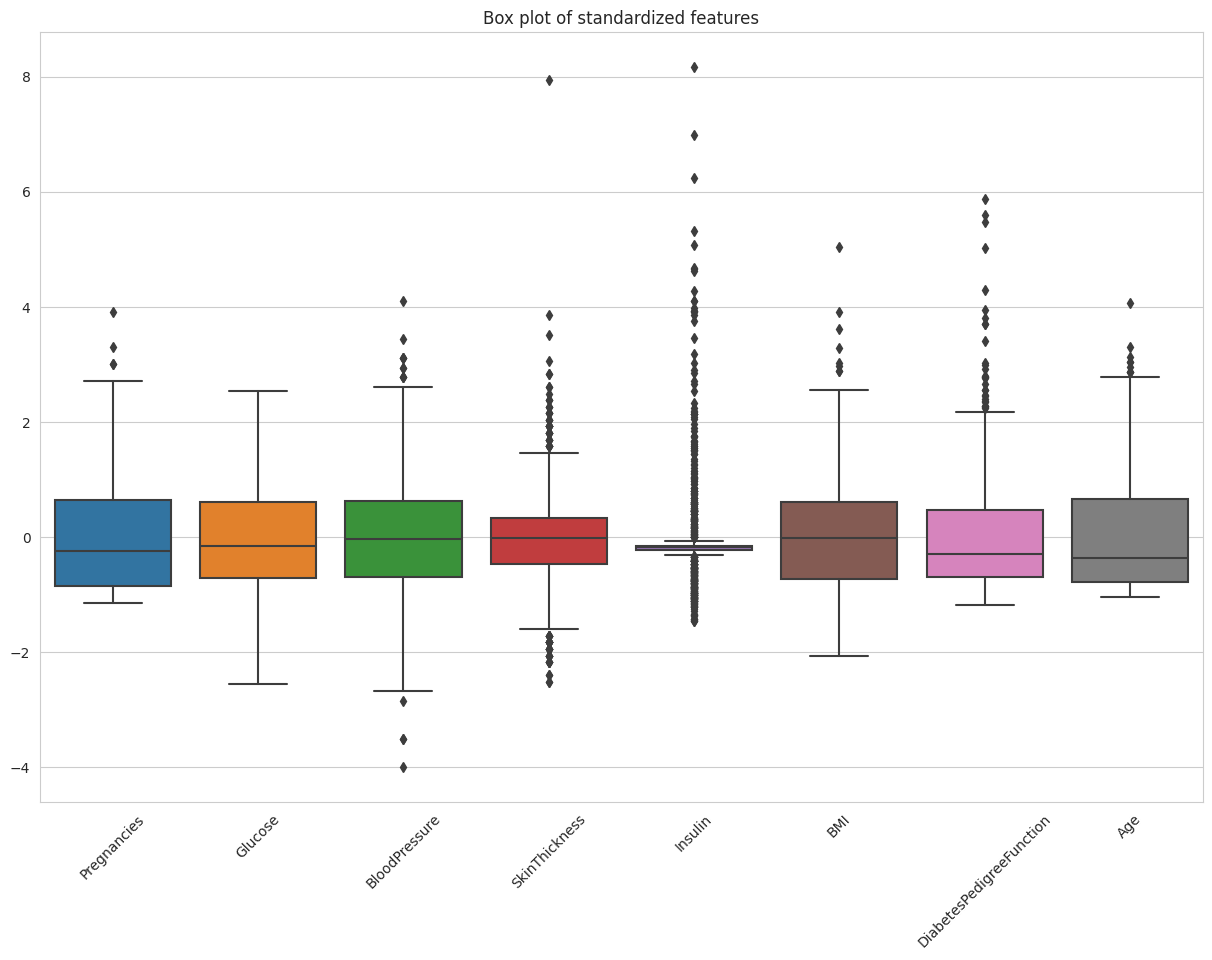

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Draw box plots for each feature to visualize the outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=standardized_data.drop(columns='Outcome'))
plt.title('Box plot of standardized features')
plt.xticks(rotation=45)
plt.show()


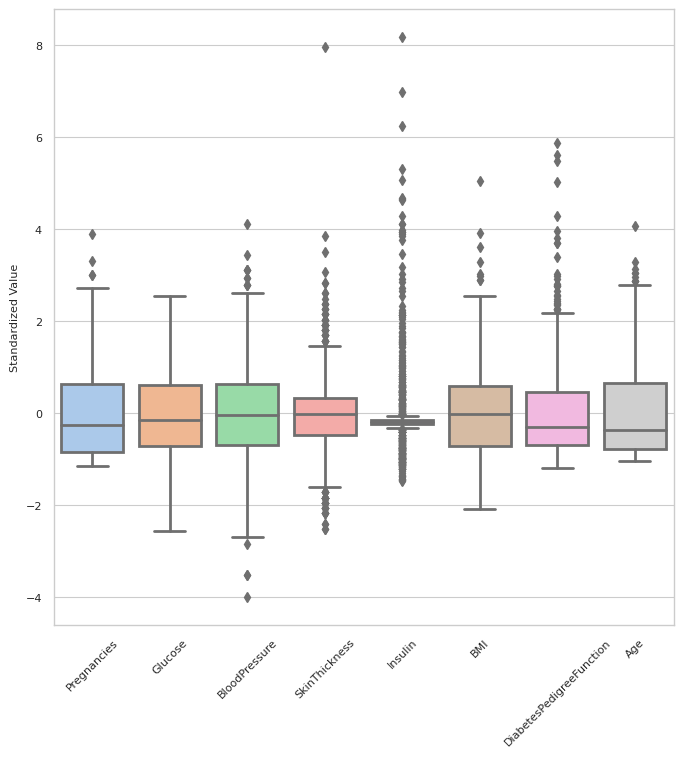

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Set the font scale to ensure the readability of the font
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2})

# Draw box plots for each feature to visualize the outliers
plt.figure(figsize=(8, 8))
box_plot = sns.boxplot(data=standardized_data.drop(columns='Outcome'))
#plt.title('Box plot of standardized features', fontsize=20)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
#box_plot.set_xlabel('Features', fontsize=16)
box_plot.set_ylabel('Standardized Value', fontsize=8)

# Save the plot as a high-resolution PNG file for inclusion in your CVPR paper
plt.savefig('box_plot.png', dpi=1200, bbox_inches='tight')
plt.show()
